In [112]:
import pandas as pd

blue_heg_readings = pd.read_csv("HEG_readings_blue.csv")
green_heg_readings = pd.read_csv("HEG_readings_green.csv")
red_heg_readings = pd.read_csv("HEG_readings_red.csv")

blue_heg_readings.drop(columns=["timestamp"], inplace=True)
green_heg_readings.drop(columns=["timestamp"], inplace=True)
red_heg_readings.drop(columns=["timestamp"], inplace=True)



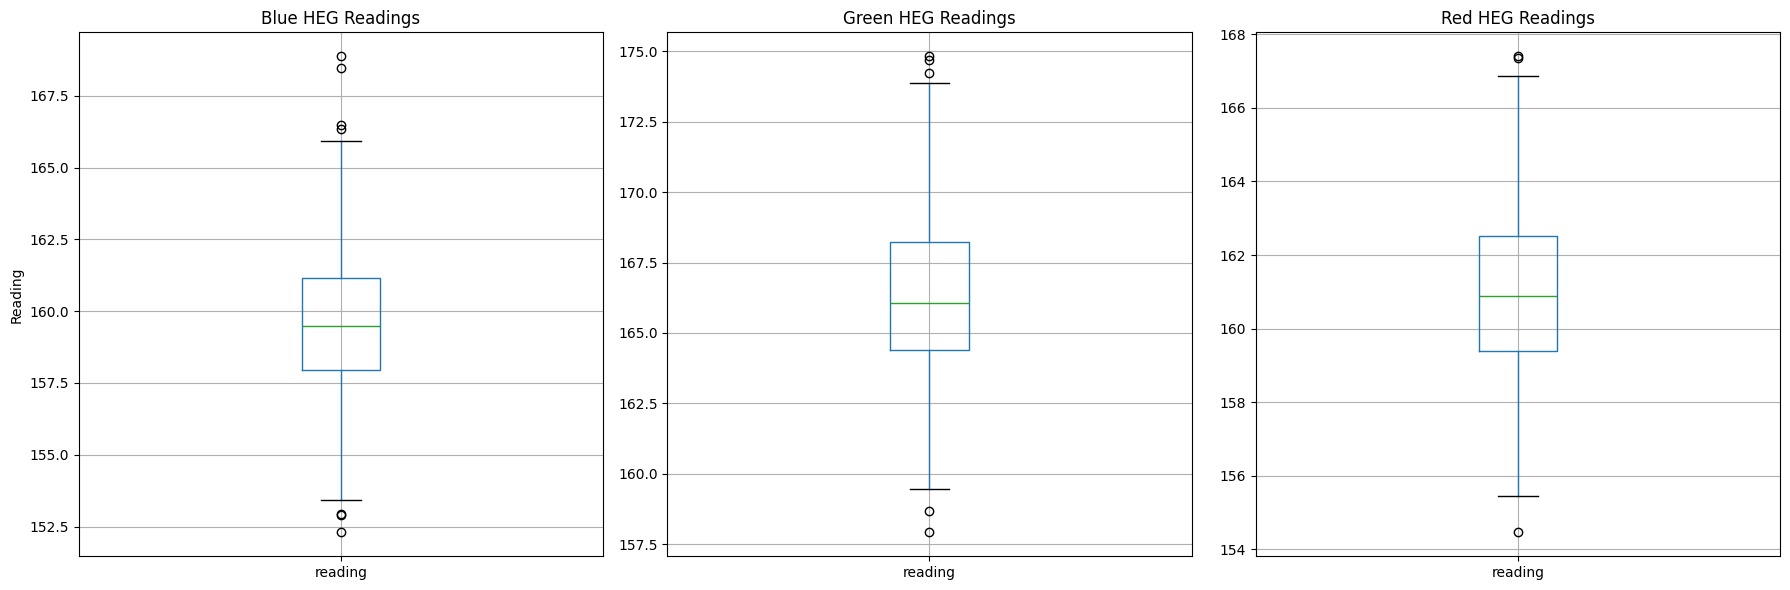

In [113]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

blue_heg_readings.boxplot(ax=axes[0])
axes[0].set_title('Blue HEG Readings')
axes[0].set_ylabel('Reading')

green_heg_readings.boxplot(ax=axes[1])
axes[1].set_title('Green HEG Readings')

red_heg_readings.boxplot(ax=axes[2])
axes[2].set_title('Red HEG Readings')

plt.tight_layout()
plt.show()


In [114]:
# add labels
blue_heg_readings["label"] = "blue"
green_heg_readings["label"] = "green"
red_heg_readings["label"] = "red"

# combine the dataframes
df = pd.concat([blue_heg_readings, green_heg_readings, red_heg_readings])

In [115]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [116]:
x = df[["reading"]]
y = df["label"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [117]:
predictions = model.predict(x_test)

print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

        blue       0.58      0.65      0.61       117
       green       0.79      0.84      0.82       115
         red       0.50      0.41      0.45       126

    accuracy                           0.63       358
   macro avg       0.62      0.64      0.63       358
weighted avg       0.62      0.63      0.62       358



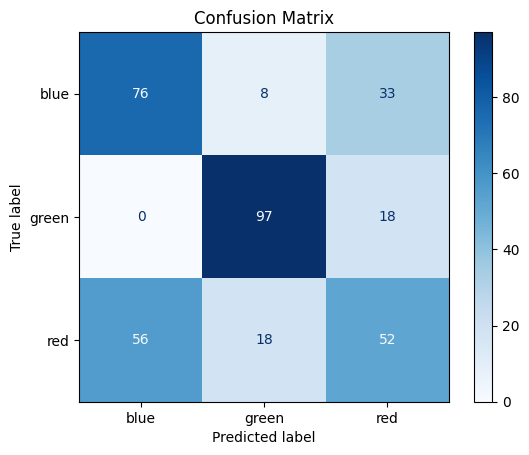

In [118]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute the confusion matrix using the true labels and predictions
cm = confusion_matrix(y_test, predictions, labels=model.classes_)

# Create a confusion matrix display and plot it
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()
